In [109]:
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import KMeans

In [111]:
votes = pd.read_csv('114_congress.csv')

In [113]:
votes.head()

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
0,Alexander,R,TN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Ayotte,R,NH,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,Baldwin,D,WI,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
3,Barrasso,R,WY,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,Bennet,D,CO,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [115]:
votes['party'].value_counts()

party
R    54
D    44
I     2
Name: count, dtype: int64

In [117]:
int_columns = [col for col in votes.columns if not any(c.isalpha() for c in str(col))]
mean_values = votes[int_columns].mean()

print(mean_values)

00001    0.325
00004    0.575
00005    0.535
00006    0.945
00007    0.545
00008    0.415
00009    0.545
00010    0.985
00020    0.525
00026    0.545
00032    0.410
00038    0.480
00039    0.510
00044    0.460
00047    0.370
dtype: float64


In [119]:
votes_df = votes.iloc[0:,3:]

In [121]:
votes_df.head()

,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
3,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [123]:
kmeans_model = KMeans(n_clusters=2, random_state=1)

In [125]:
senator_distance = kmeans_model.fit_transform(votes_df)

C:\Users\MPEIRRON\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [127]:
print(senator_distance)

[[3.05549495 1.32795748]
 [2.55656985 2.08889231]
 [0.39783364 3.47194184]
 [3.34704587 0.19025863]
 [1.39938258 3.02411793]
 [0.39783364 3.47194184]
 [3.34704587 0.19025863]
 [0.39783364 3.47194184]
 [3.34704587 0.19025863]
 [0.34551804 3.36355037]
 [0.39783364 3.47194184]
 [3.19764574 0.98156562]
 [0.39783364 3.47194184]
 [3.27743878 0.52640995]
 [0.39783364 3.47194184]
 [1.15587602 3.18231165]
 [1.21218097 3.19087024]
 [3.34704587 0.19025863]
 [3.34704587 0.19025863]
 [3.34704587 0.19025863]
 [2.55656985 2.08889231]
 [0.61232203 3.36760208]
 [3.34704587 0.19025863]
 [3.34704587 0.19025863]
 [3.34704587 0.19025863]
 [3.34704587 0.19025863]
 [3.49005642 0.92432687]
 [3.34704587 0.19025863]
 [1.6873531  2.87936517]
 [0.39783364 3.47194184]
 [3.34704587 0.19025863]
 [3.34704587 0.19025863]
 [0.39783364 3.47194184]
 [3.34704587 0.19025863]
 [3.34704587 0.19025863]
 [0.61232203 3.36760208]
 [3.19764574 0.93411026]
 [0.39783364 3.47194184]
 [3.12204428 0.66729997]
 [3.34704587 0.19025863]


In [129]:
labels = kmeans_model.labels_
print(pd.crosstab(labels, votes['party']))

party   D  I   R
row_0           
0      43  2   0
1       1  0  54


In [131]:
traitor = votes[(labels == 1) & (votes['party'] == 'D')]

In [133]:
traitor

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
56,Manchin,D,WV,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


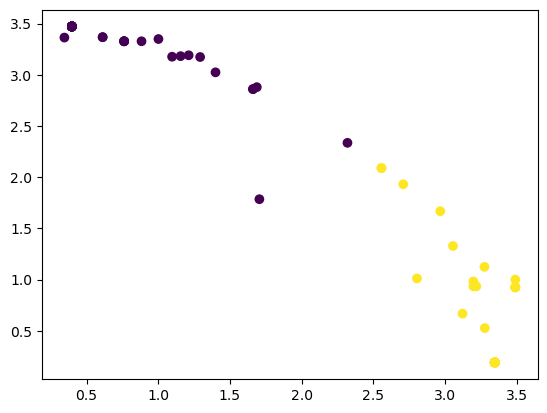

In [135]:
import matplotlib.pyplot as plt

plt.scatter(x=senator_distance[:,0], y=senator_distance[:,1], c=labels)
plt.show()

In [137]:
cubic_distances = senator_distance ** 3

In [165]:
extremism = cubic_distances.sum(axis=1)

In [167]:
extremism

array([30.86806634, 25.82468793, 41.91507266, 37.50289152, 30.39680439,
       41.91507266, 37.50289152, 41.91507266, 37.50289152, 38.09467867,
       41.91507266, 33.64144038, 41.91507266, 35.35082467, 41.91507266,
       33.77191943, 34.26949099, 37.50289152, 37.50289152, 37.50289152,
       25.82468793, 38.42069543, 37.50289152, 37.50289152, 37.50289152,
       37.50289152, 43.30033725, 37.50289152, 28.67624406, 41.91507266,
       37.50289152, 37.50289152, 41.91507266, 37.50289152, 37.50289152,
       38.42069543, 33.5107994 , 41.91507266, 30.72820819, 37.50289152,
       37.50289152, 37.28673777, 25.21902969, 34.1524089 , 41.91507266,
       37.50289152, 37.50289152, 37.50289152, 37.50289152, 37.53399033,
       37.28673777, 30.75642606, 33.37318685, 43.30033725, 41.91507266,
       36.5432433 , 27.06524269, 41.91507266, 37.50289152, 27.98341337,
       37.50289152, 41.91507266, 41.91507266, 41.91507266, 37.50289152,
       37.50289152, 41.91507266, 41.91507266, 38.57692465, 43.30

In [169]:
votes_df['extremism'] = extremism

In [171]:
votes_df.head(10)

,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047,extremism
0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,30.868066
1,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,25.824688
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,41.915073
3,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,37.502892
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,30.396804
5,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,41.915073
6,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,37.502892
7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,41.915073
8,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,37.502892
9,0.5,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,38.094679


In [173]:
votes['extremism'] = extremism

In [175]:
votes.head(10)

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047,extremism
42,Heitkamp,D,ND,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,30.868066
1,Ayotte,R,NH,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,25.824688
20,Collins,R,ME,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,41.915073
56,Manchin,D,WV,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,37.502892
51,Kirk,R,IL,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,30.396804
28,Donnelly,D,IN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,41.915073
89,Tester,D,MT,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,37.502892
59,McCaskill,D,MO,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,41.915073
98,Wicker,R,MS,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,37.502892
95,Warner,D,VA,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,38.094679


In [177]:
ranked_extremism = votes.sort_values('extremism', ascending=False)

In [179]:
ranked_extremism.head(10)

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047,extremism
64,Moran,R,KS,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,43.510363
18,Coats,R,IN,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,43.300337
25,Crapo,R,ID,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,43.300337
99,Wyden,D,OR,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,43.300337
41,Heinrich,D,NM,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,43.300337
74,Reid,D,NV,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,41.915073
73,Reed,D,RI,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,41.915073
60,McConnell,R,KY,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,41.915073
81,Schatz,D,HI,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,41.915073
19,Cochran,R,MS,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,41.915073
